In [29]:
# imports
import librosa
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

from DTW import dtw_table, dtw, display_dtw_path

In [2]:
def dtw_mir(chromagram1, chromagram2):
    """
    Implementation from the mir website:
    https://musicinformationretrieval.com/
    """
    distance_matrix = dtw_table(chromagram1.T, chromagram2.T)
    path = dtw(chromagram1.T, chromagram1.T, distance_matrix)
    
    return distance_matrix, path

def dtw_librosa(chromagram1, chromagram2):
    """
    Librosa implementation
    """
    D, wp = librosa.sequence.dtw(X=chromagram1, Y=chromagram2, metric='euclidean')
    return D, wp

# Placeholder for FMP method
def dtw_fmp(chromagram1, chromagram2):
    """
    Implement DTW using FMP techniques (to be implemented later).
    """
    return None, None


In [3]:
chromagram1 = np.load('../chromagrams/30sec_sr10000_numpy_files/1727.npy')
chromagram2 = np.load('../chromagrams/30sec_sr10000_numpy_files/1772.npy')

#### time taken for dtw_mir()

In [9]:
start_time = time()
dist_mat_1, wpath_1 = dtw_mir(chromagram1, chromagram2)
time_taken = time()-start_time
print('time taken for dtw_mir(): {} seconds'.format((round(time_taken, 2))))

time taken for dtw_mir(): 6.38 seconds


#### time taken for dtw_librosa()

In [10]:
start_time = time()
dist_mat_2, wpath_2 = dtw_librosa(chromagram1, chromagram2)
time_taken = time()-start_time
print('time taken for dtw_librosa(): {} seconds'.format((round(time_taken, 2))))

time taken for dtw_librosa(): 0.02 seconds


#### output comparison

In [12]:
np.array_equal(dist_mat_1, dist_mat_2), np.array_equal(wpath_1, wpath_2)

(False, False)

In [28]:
dist_mat_1.shape, dist_mat_2.shape, wpath_1.shape, wpath_2.shape

((587, 587), (586, 586), (699, 2), (698, 2))

In [48]:
wpath_1, wpath_2[::-1]

(array([[  0,   0],
        [  1,   1],
        [  2,   1],
        ...,
        [584, 584],
        [585, 585],
        [586, 586]]),
 array([[  0,   0],
        [  1,   0],
        [  2,   0],
        ...,
        [583, 583],
        [584, 584],
        [585, 585]]))

In [28]:
dist_mat_1[:2], dist_mat_2.shape, wpath_1.shape, wpath_2.shape

((587, 587), (586, 586), (699, 2), (698, 2))

In [43]:
np.round(dist_mat_1[1:,1:], 2) == np.round(dist_mat_2, 2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
Looks like the dtw 

In [22]:
wpath_1

array([[  0,   0],
       [  1,   1],
       [  2,   1],
       ...,
       [584, 584],
       [585, 585],
       [586, 586]])

In [23]:
wpath_2[::-1]

array([[  0,   0],
       [  1,   0],
       [  2,   0],
       ...,
       [583, 583],
       [584, 584],
       [585, 585]])

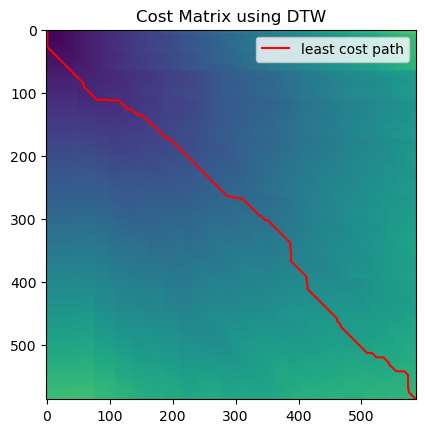

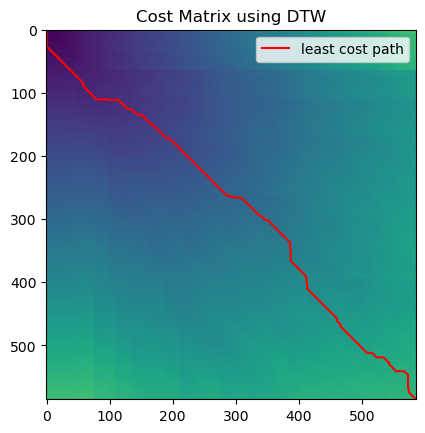

In [32]:
display_dtw_path(dist_mat_1, wpath_1)
display_dtw_path(dist_mat_2, wpath_2)

#### time taken for dtw_mir()

In [9]:
start_time = time()
dist_mat_1, wpath_1 = dtw_mir(chromagram1, chromagram2)
time_taken = time()-start_time
print('time taken for dtw_mir(): {} seconds'.format((round(time_taken, 2))))

time taken for dtw_mir(): 6.38 seconds


#### time taken for dtw_librosa()

In [10]:
start_time = time()
dist_mat_2, wpath_2 = dtw_librosa(chromagram1, chromagram2)
time_taken = time()-start_time
print('time taken for dtw_librosa(): {} seconds'.format((round(time_taken, 2))))

time taken for dtw_librosa(): 0.02 seconds
